#  **<<< Only Problem 1, 4 and 9 (เฉพาะข้อย่อยข้อคี่) will be graded >>>**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import IPython.display as ipd
import os
from scipy import signal,fftpack
from skimage.io import imread
import cv2

ModuleNotFoundError: No module named 'cv2'

## Problem 1
Sketch the following signals

1.
$x(t) = \sin \left (\frac{\pi}{4}t + 20^\circ \right)$


2.
$x(t) = \begin{cases}t+2 , t \leq -2 \\ 0 , -2 \leq t \leq 2\\ t-2 , t \geq 2 \end{cases}$

3.
$x(t) = 2e^{-t}, 0 \leq t < 1$ and $ x(t+1) = x(t) $ for all $t$

4.
$x(t) = u(t) + 5u(t-1) -2u(t-2)$

5.
$x(t) = r(t) - r(t-1) - u(t-2)$




In [2]:
#pb1
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: x(t) = sin((π/4)t + 20°)
t1 = np.linspace(-10, 10, 400)
x1 = np.sin((np.pi / 4) * t1 + np.deg2rad(20))

# Problem 2: Piecewise function
t2 = np.linspace(-5, 5, 400)
x2 = np.piecewise(t2, [t2 <= -2, (-2 < t2) & (t2 <= 2), t2 > 2], 
                   [lambda t: t + 2, 0, lambda t: t - 2])

# Problem 3: Periodic exponential decay
t3 = np.linspace(-3, 3, 600)
x3 = np.exp(-np.mod(t3, 1)) * 2

# Problem 4: Step functions: u(t) + 5u(t-1) - 2u(t-2)
def u(t):
    return np.heaviside(t, 1)

t4 = np.linspace(-3, 5, 400)
x4 = u(t4) + 5*u(t4 - 1) - 2*u(t4 - 2)

# Problem 5: r(t) - r(t-1) - u(t-2)
def r(t):
    return np.maximum(0, t)

x5 = r(t4) - r(t4 - 1) - u(t4 - 2)

# Plotting
fig, axs = plt.subplots(5, 1, figsize=(8, 12))
fig.tight_layout(pad=3.0)

# Plot 1
axs[0].plot(t1, x1, label=r'$x(t) = \sin \left(\frac{\pi}{4}t + 20^\circ\right)$')
axs[0].set_title("Signal 1")
axs[0].legend()

# Plot 2
axs[1].plot(t2, x2, label=r'$x(t) = \text{piecewise function}$')
axs[1].set_title("Signal 2")
axs[1].legend()

# Plot 3
axs[2].plot(t3, x3, label=r'$x(t) = 2e^{-t}, 0 \leq t < 1; x(t+1) = x(t)$')
axs[2].set_title("Signal 3")
axs[2].legend()

# Plot 4
axs[3].plot(t4, x4, label=r'$x(t) = u(t) + 5u(t-1) - 2u(t-2)$')
axs[3].set_title("Signal 4")
axs[3].legend()

# Plot 5
axs[4].plot(t4, x5, label=r'$x(t) = r(t) - r(t-1) - u(t-2)$')
axs[4].set_title("Signal 5")
axs[4].legend()

plt.show()


ValueError: 
x(t) = \text{piecewise function}
       ^
Unknown symbol: \text, found '\'  (at char 7), (line:1, col:8)

<Figure size 576x864 with 5 Axes>

## Problem 2
Determine whether each of following signals is periodic, and if so, find its period.
1.
$x(t) = \sin \left( \frac{\pi}{3}t \right) + \cos \left( \frac{8\pi}{3}t \right)$
2.
$x(t) = \exp \left  (j\frac{7\pi}{6}t \right) +  \exp \left( j\frac{5\pi}{6}t \right) $

3.
$x(t) = \exp \left( j\frac{7\pi}{6}t \right) +  \exp \left(\frac{5\pi}{6}t \right) $


## Problem 3
Determine whether the following signals are power or energy signals or neither. Justify your answers

1. $x(t) = A\sin( t ), -\infty < t < \infty$
2. $x(t) = A(u(t-a) - u(t+a)), \, a>0 $
4. $x(t) = \exp(-at)u(t), \,  a>0 $
7. $x(t) = A\exp(bt)u(t), \, b>0$



## Problem 4
For the discrete time signal x[n] shown in Figure below, sketch each of the following

1. $x[2-n] $
2. $x[3n-4] $
3. $x\left[ \frac{2}{3}n+1 \right]  $
4. $x\left[-\frac{n+8}{4} \right] $
5. $x[n^3] $
8. $x[2-n] +x[3n-4] $

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


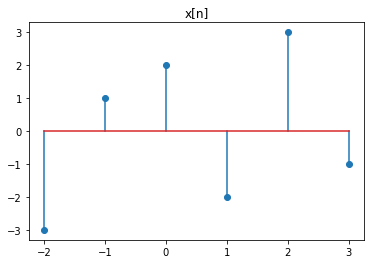

In [ ]:
# x[n]
t = np.arange(-2,4)
x_t = np.array([-3,1,2,-2,3,-1])
plt.stem(t, x_t)
plt.title('x[n]')
plt.show()

## Problem 5
Determine whether each of following signals is periodic, and if so, find its period.

1.
$x[n] = \sin \left( \frac{\pi n}{4} + \frac{\pi}{8}\right)$

2.
$x[n] = \sin \left( \frac{3\pi n}{4}\right) + \sin\left( \frac{\pi}{3}n\right)$

3.
$x[n] = \sin \left( \frac{3\pi n}{4}\right)\sin\left( \frac{\pi}{3}n\right)$

4.
$x[n] = \exp \left( \frac{6\pi}{5}n \right)$

5.
$x[n] = \exp \left( j\frac{5\pi}{6}n \right)$

6.
$x[n] =  \sum_{m=-\infty}^{\infty} \left[ \delta[n-2m] + 2\delta[n-3m] \right]$

<!-- 1.
$x[n] = \sin \left( \frac{3\pi n}{4}\right) + \cos \left( \frac{\pi}{3} n \right)$ -->

 ## Problem 6

 [python] Signal transformations :
 Study the sawtooth function in the figure below. Apply reflection, scaling, shifting operations to the signal and plot the transformed signals compared with the original sawtooth signal.  


In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))
# plt.show()

In [ ]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

# scaling factor = 3 and 1/3
## TODO : writing code for time scaling

In [ ]:
# t = np.linspace(-1, 1, 500)
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

# shifting t to the left and right 0.05 units

## TODO : writing code for time shifting

In [ ]:
# plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

## TODO : writing code for time Reflection


  ## Problem 7
 [python] Elementary signals: study  the ramp signal plotted in the example below. \\
TODO : plot these signals

1.   Unit step function
2.   Unit impulse function



In [ ]:
# t = np.linspace(-1, 1, 500)
# ramp_t = t.copy()
# ramp_t[ramp_t < 0 ] = 0
# plt.plot(t, ramp_t)
# plt.show()

In [ ]:
## TODO : writing code for plotting unit step function

In [ ]:
## TODO : writing code for plotting unit impulse function

## Problem 8
Express the signal that shown in Figure below using Unit-ramp functions



<a href="https://ibb.co/pXt8t2Y"><img src="https://i.ibb.co/DKxyx40/Screen-Shot-2564-08-11-at-15-16-52.png" alt="Screen-Shot-2564-08-11-at-15-16-52" border="0"></a>



## Problem 9

Evaluate the following integrals

1. $\int_{-\infty}^{\infty} \left( \frac{2}{3}t-\frac{3}{2} \right) \delta(t-1) \,dt$

1. $\int_{-\infty}^{\infty} (t-1) \delta \left(\frac{2}{3}t- \frac{3}{2} \right) \,dt$

1. $\int_{-3}^{-2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt$

1. $\int_{-3}^{2} \left[ e^{(-t+1)} + \sin \left( \frac{2\pi t}{3} \right) \right] \delta \left(t- \frac{3}{2} \right) \,dt$